In [111]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,model_selection
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,callbacks
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import joblib

In [37]:
data_to_load = files.upload()

Saving depression_happiness.csv to depression_happiness (1).csv


In [76]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['depression_happiness.csv']))
df


,Timestamp,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours),Depressed
0,11/28/2020 19:26,4th year,Normal,50,Male,23.00,Home,In a relationship,No,2,Normal,No,No,No,Friends,Yes,Yes,Yes,No,Yes,7.0,1
1,12/22/2020 19:21,4th year,Very good,80,Male,23.00,Home,In a relationship,No,1,Normal,Yes,No,No,No one,Yes,Yes,Yes,No,Yes,7.0,0
2,12/22/2020 19:24,4th year,Good,70,Male,23.00,Home,In a relationship,No,1,Good,Yes,No,Not applicable,Friends,Yes,Maybe,Yes,No,Yes,7.0,1
3,12/22/2020 19:27,4th year,Normal,60,Male,23.00,Home,In a relationship,No,2,Normal,Yes,No,Yes,Not applicable,Yes,Not applicable,Neutral,No,No,8.0,1
4,12/22/2020 19:37,4th year,Bad,35,Male,22.75,Home,In a relationship,No,1,Good,Not applicable,No,No,Not applicable,Yes,Maybe,Yes,No,No,8.0,1
5,12/22/2020 20:13,4th year,Normal,65,Male,22.75,Home,In a relationship,No,1,Good,Yes,No,No,No one,Yes,Maybe,No,Yes,No,6.0,1
6,12/22/2020 20:15,4th year,Good,67,Male,22.75,Home,In a relationship,No,1,Good,Yes,No,Not applicable,Not applicable,Yes,Not applicable,Neutral,Yes,No,6.5,0
7,12/22/2020 20:17,4th year,Bad,35,Male,22.75,Home,In a relationship,No,1,Normal,Yes,No,No,Not applicable,Yes,Maybe,Yes,No,Yes,8.0,0
8,12/22/2020 20:20,4th year,Normal,45,Male,22.75,Home,In a relationship,No,2,Normal,Yes,No,No,Family,Yes,Yes,Yes,No,No,7.0,0
9,12/22/2020 20:21,4th year,Very good,85,Male,22.75,Home,In a relationship,No,1,Good,Yes,No,No,No one,Yes,Maybe,No,No,No,6.5,1


In [77]:
from numpy.random import seed
# setting the seed
seed(0)
tf.random.set_seed(0)

In [78]:
df.shape

(1000, 22)

In [79]:
df.isnull().sum()

Timestamp                                                                                       0
Which year are you in?                                                                          0
How are you feeling right now?                                                                  0
On a scale of 1-100, how would you express this feeling?                                        0
Gender                                                                                          0
Age                                                                                             0
Your location ?                                                                                 0
Relationship status                                                                             0
Are you happy with your financial state?                                                        0
How much have you succeeded to cope up with the environment of your educational institution?    0
Understanding with y

In [80]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
df['Feeling'] = le.fit_transform(df['How are you feeling right now?'])
df['Genders'] = le.fit_transform(df['Gender'])
df['Relation Status'] = le.fit_transform(df['Relationship status'])
df['Pressure Study'] = le.fit_transform(df['Are you feeling pressure in your study or work right now?'])
df['Financial Status'] = le.fit_transform(df['Are you happy with your financial state?'])
df['Academic Result'] = le.fit_transform(df['Are you satisfied with your academic result?'])
df['Living Place'] = le.fit_transform(df['Are you happy with your living place?'])
df['Support'] = le.fit_transform(df['Who supports you when you are not succeeding in your academic life?'])
df['Social Media'] = le.fit_transform(df['Have you used any social media within the last 6 hours?'])
df['Meal'] = le.fit_transform(df['Are you satisfied with your meal today?'])
df['Sick'] = le.fit_transform(df['Are you feeling sick/health issues today?'])
df['Hobby'] = le.fit_transform(df['Have you done any recreational activity (sports, gaming, hobby etc.) today?'])
var_mod = ['Feeling','Gender','Age','Relation Status','Financial Status','Pressure Study','Academic Result','Living Place','Support','Social Media','Meal','Sick','Hobby','How long did you sleep last night?(in hours)','Depressed']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [81]:
df.columns

Index(['Timestamp', 'Which year are you in?', 'How are you feeling right now?',
       'On a scale of 1-100, how would you express this feeling?', 'Gender',
       'Age', 'Your location ?', 'Relationship status',
       'Are you happy with your financial state?',
       'How much have you succeeded to cope up with the environment of your educational institution?',
       'Understanding with your family members?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your academic result?',
       'Are you happy with your living place?',
       'Who supports you when you are not succeeding in your academic life?',
       'Have you used any social media within the last 6 hours?',
       'Do you have inferiority complex? ',
       'Are you satisfied with your meal today?',
       'Are you feeling sick/health issues today?',
       'Have you done any recreational activity (sports, gaming, hobby etc.) today?',
       'How long did you sleep last 

In [82]:
del df['Timestamp']
del df['Which year are you in?']
del df['How are you feeling right now?']
del df['On a scale of 1-100, how would you express this feeling?']
del df['Gender']
del df['Your location ?']
del df['Relationship status']
del df['Are you happy with your financial state?']
del df['How much have you succeeded to cope up with the environment of your educational institution?']
del df['Understanding with your family members?']
del df['Are you feeling pressure in your study or work right now?']
del df['Are you satisfied with your academic result?']
del df['Are you happy with your living place?']
del df['Who supports you when you are not succeeding in your academic life?']
del df['Have you used any social media within the last 6 hours?']
del df['Do you have inferiority complex? ']
del df['Are you satisfied with your meal today?']
del df['Are you feeling sick/health issues today?']
del df['Have you done any recreational activity (sports, gaming, hobby etc.) today?']
del df['Age']
del df['Feeling']
del df['Genders']

In [83]:
df

,How long did you sleep last night?(in hours),Depressed,Relation Status,Pressure Study,Financial Status,Academic Result,Living Place,Support,Social Media,Meal,Sick,Hobby
0,7,1,0,0,0,0,0,1,2,2,0,1
1,7,0,0,2,0,0,0,2,2,2,0,1
2,7,1,0,2,0,0,1,1,2,2,0,1
3,9,1,0,2,0,0,2,3,2,0,0,0
4,9,1,0,1,0,0,0,3,2,2,0,0
5,5,1,0,2,0,0,0,2,2,1,1,0
6,6,0,0,2,0,0,1,3,2,0,1,0
7,9,0,0,2,0,0,0,3,2,2,0,1
8,7,0,0,2,0,0,0,0,2,2,0,0
9,6,1,0,2,0,0,0,2,2,1,0,0


In [84]:
X = df.drop('Depressed', axis = 1)

In [85]:
Y = df['Depressed']

In [106]:
df.columns

Index(['How long did you sleep last night?(in hours)', 'Depressed',
       'Relation Status', 'Pressure Study', 'Financial Status',
       'Academic Result', 'Living Place', 'Support', 'Social Media', 'Meal',
       'Sick', 'Hobby'],
      dtype='object')

In [87]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.2)

In [88]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(800, 11) (800,) (200, 11) (200,)


In [89]:
from collections import Counter
print(Counter(Y_train))

Counter({1: 423, 0: 377})


In [94]:
model=keras.Sequential([
    layers.Dense(15,activation='relu',input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(11,activation='relu'),
    layers.Dense(1),])

In [95]:
Early_Stopping = callbacks.EarlyStopping(min_delta = 0.001, patience = 20, restore_best_weights = True)

In [96]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [97]:
history = model.fit(X_train,Y_train,
                  validation_data=(X_test,Y_test),batch_size=256,
                  epochs=500,callbacks=[Early_Stopping],verbose=2)

Epoch 1/500
4/4 - 1s - loss: 3.6884 - val_loss: 3.9556
Epoch 2/500
4/4 - 0s - loss: 4.0246 - val_loss: 3.2941
Epoch 3/500
4/4 - 0s - loss: 3.3291 - val_loss: 2.8794
Epoch 4/500
4/4 - 0s - loss: 3.3725 - val_loss: 2.5898
Epoch 5/500
4/4 - 0s - loss: 3.0333 - val_loss: 2.0116
Epoch 6/500
4/4 - 0s - loss: 2.8642 - val_loss: 1.5186
Epoch 7/500
4/4 - 0s - loss: 2.8750 - val_loss: 1.3080
Epoch 8/500
4/4 - 0s - loss: 2.8300 - val_loss: 1.0875
Epoch 9/500
4/4 - 0s - loss: 2.7418 - val_loss: 1.0492
Epoch 10/500
4/4 - 0s - loss: 2.6111 - val_loss: 0.9222
Epoch 11/500
4/4 - 0s - loss: 2.6205 - val_loss: 0.9025
Epoch 12/500
4/4 - 0s - loss: 2.1889 - val_loss: 0.8932
Epoch 13/500
4/4 - 0s - loss: 2.4377 - val_loss: 0.8936
Epoch 14/500
4/4 - 0s - loss: 2.4798 - val_loss: 0.8935
Epoch 15/500
4/4 - 0s - loss: 2.2142 - val_loss: 0.8423
Epoch 16/500
4/4 - 0s - loss: 1.9984 - val_loss: 0.9885
Epoch 17/500
4/4 - 0s - loss: 2.2204 - val_loss: 0.9983
Epoch 18/500
4/4 - 0s - loss: 2.0132 - val_loss: 1.0046
E

In [98]:
accuracy=model.evaluate(X_train,Y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.8400


In [99]:
print(accuracy*100)

83.99744629859924


In [58]:
history_df=pd.DataFrame(history.history)

In [59]:
history_df.columns

Index(['loss', 'val_loss'], dtype='object')

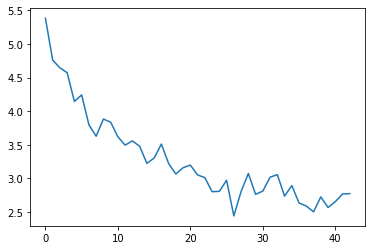

In [60]:
history_df.loc[:,'loss'].plot()

In [100]:
pd.set_option('display.max_rows', None)
df['Depressed']

0      1
1      0
2      1
3      1
4      1
5      1
6      0
7      0
8      0
9      1
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     0
32     0
33     0
34     1
35     1
36     1
37     0
38     1
39     1
40     1
41     1
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [66]:
X.columns[0]

'Age'

In [101]:
model.predict_classes(X)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [ ]:
from keras.models import load_model

model.save("network.h5")
loaded_model = load_model("network.h5")

accuracy = loaded_model.predict_classes(X)

In [103]:
files.download("network.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>